!pip install --upgrade pip
!pip install -r requirements.txt


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preview data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check dataset dimensions
print("Dataset shape:", df.shape)




Dataset shape: (7043, 21)


In [5]:
# Data types and non-null counts
print("\nData types and missing values info:")
df.info()



Data types and missing values info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paper

In [6]:

# Check for missing values explicitly
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


customerID unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values: ['Female' 'Male']
Partner unique values: ['Yes' 'No']
Dependents unique values: ['No' 'Yes']
PhoneService unique values: ['No' 'Yes']
MultipleLines unique values: ['No phone service' 'No' 'Yes']
InternetService unique values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values: ['No' 'Yes' 'No internet service']
OnlineBackup unique values: ['Yes' 'No' 'No internet service']
DeviceProtection unique values: ['No' 'Yes' 'No internet service']
TechSupport unique values: ['No' 'Yes' 'No internet service']
StreamingTV unique values: ['No' 'Yes' 'No internet service']
StreamingMovies unique values: ['No' 'Yes' 'No internet service']
Contract unique values: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling unique values: ['Yes' 'No']
PaymentMethod unique values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

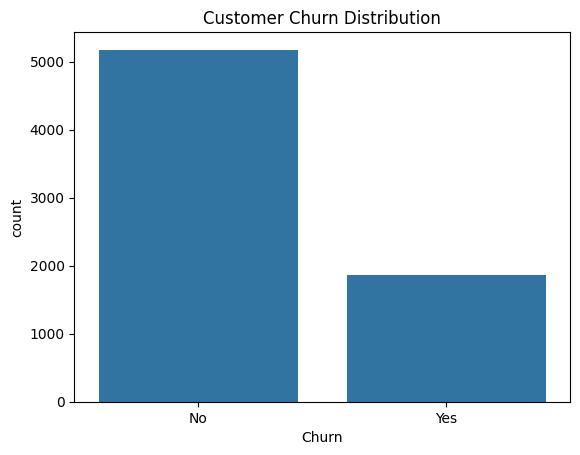

In [7]:
# Check unique values for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"{column} unique values: {df[column].unique()}")

# Churn rate
churn_rate = df['Churn'].value_counts(normalize=True)
print("\nChurn Rate:\n", churn_rate)

# Plot churn rate
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()


In [8]:
# Convert 'TotalCharges' to numeric (there might be errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Re-check missing values after conversion
print("\nMissing values after TotalCharges conversion:\n", df.isnull().sum())

# Basic statistical summary of numerical columns
print("\nNumerical data description:\n", df.describe())



Missing values after TotalCharges conversion:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Numerical data description:
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70

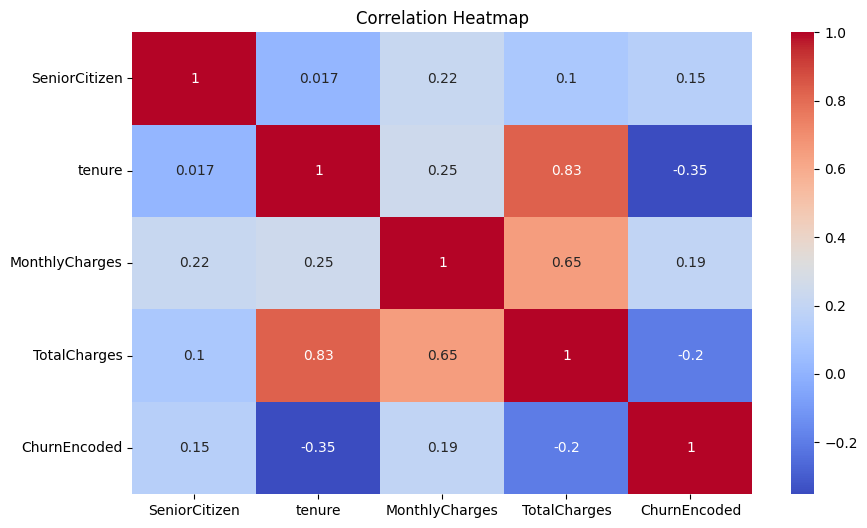

In [9]:
# Encode Churn temporarily for correlation check
df['ChurnEncoded'] = df['Churn'].map({'Yes':1, 'No':0})

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [10]:
# Handling missing values (TotalCharges has some missing)
print("Missing before:", df['TotalCharges'].isnull().sum())

# Fill missing values with median or mean (since distribution might be skewed, use median)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

print("Missing after:", df['TotalCharges'].isnull().sum())


Missing before: 11
Missing after: 0


C:\Users\HP\AppData\Local\Temp\ipykernel_28500\3021517541.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [11]:
# Monthly charge per tenure month (ratio)
df['MonthlyChargePerTenure'] = df['MonthlyCharges'] / (df['tenure'] + 1)  # add 1 to avoid division by zero

# Total Services Subscribed
service_cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convert "No internet service" and "No phone service" to 'No'
for col in service_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# Count total number of services subscribed by a customer
df['TotalServices'] = df[service_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)

# Preview engineered features
df[['MonthlyChargePerTenure', 'TotalServices']].head()


,MonthlyChargePerTenure,TotalServices
0,14.925000,1
1,1.627143,3
2,17.950000,3
3,0.919565,3
4,23.566667,1


In [12]:
# Drop customerID as it's not predictive
df.drop('customerID', axis=1, inplace=True)

# Convert categorical columns to dummy variables (One-hot encoding)
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Churn')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verify encoding
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,ChurnEncoded,MonthlyChargePerTenure,TotalServices,gender_Male,Partner_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,0,14.925000,1,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,No,0,1.627143,3,True,False,...,True,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,1,17.950000,3,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,No,0,0.919565,3,True,False,...,True,True,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,Yes,1,23.566667,1,False,False,...,False,False,False,False,False,False,True,False,True,False


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (y)
X = df_encoded.drop(['Churn', 'ChurnEncoded'], axis=1)
y = df_encoded['ChurnEncoded']

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)


X_train shape: (5634, 26)
X_test shape: (1409, 26)


In [14]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Function to train and evaluate each model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    # Evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probs)
    report = classification_report(y_test, predictions)

    return accuracy, roc_auc, report

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    accuracy, roc_auc, report = train_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

    print(f"===== {model_name} =====")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Classification Report:\n", report)

    results[model_name] = {'Accuracy': accuracy, 'ROC_AUC': roc_auc}



c:\Users\HP\Downloads\Telco Cust Churn\env\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


===== Logistic Regression =====
Accuracy: 0.8062
ROC-AUC: 0.8465
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

===== Random Forest =====
Accuracy: 0.7871
ROC-AUC: 0.8235
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

===== XGBoost =====
Accuracy: 0.7786
ROC-AUC: 0.8122
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.8

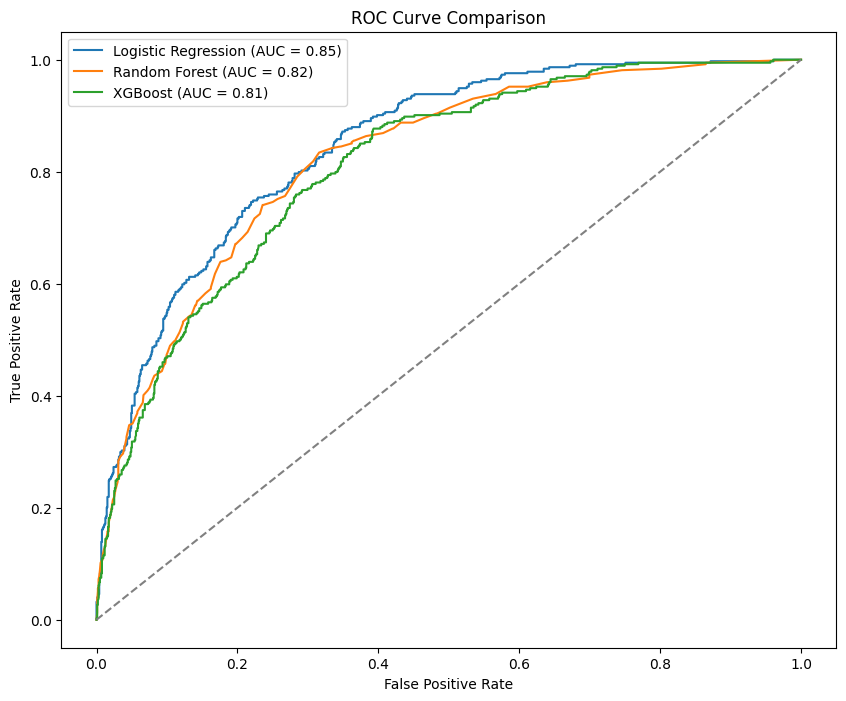

In [15]:
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [16]:
!pip install mlflow


In [17]:
import mlflow
import mlflow.sklearn

# Start MLflow run
with mlflow.start_run(run_name='Logistic Regression - Churn Prediction'):

    # Train Logistic Regression model again explicitly
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Make predictions
    predictions = model.predict(X_test_scaled)
    probs = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probs)

    # Log model parameters
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_param("max_iter", 1000)

    # Log evaluation metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("roc_auc", roc_auc)

    # Log the trained model
    mlflow.sklearn.log_model(model, "logistic_regression_model")

    print(f"Model logged with accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")


2025/04/06 15:05:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model logged with accuracy: 0.8062, ROC-AUC: 0.8465


In [20]:
import mlflow.sklearn

# Replace with your MLflow run-id
logged_model = 'C:/Users/HP/Downloads/Telco Cust Churn/mlruns/0/567166abeb08445fa0bab1b281ab71a7/artifacts/logistic_regression_model'

# Load the model from MLflow
model = mlflow.sklearn.load_model(logged_model)


In [22]:
import joblib
import os

# Create a model directory if it doesn't exist
os.makedirs("telco-churn-deployment/model", exist_ok=True)

# Save the model
joblib.dump(model, "telco-churn-deployment/model/logistic_regression_model.pkl")

print("✅ Model saved successfully!")



✅ Model saved successfully!


In [23]:
import os
print(os.listdir("telco-churn-deployment/model"))


['logistic_regression_model.pkl']


In [24]:
import json
print(json.dumps({"data": [X_test_scaled[0].tolist()]}))


{"data": [[-0.44177295439277764, 1.6084834273893616, 1.6299763471022684, 2.7076141006572096, -0.4798303764952083, 2.184869503901784, 0.9943362376363841, 1.0317424524031547, 1.5347862362384515, 0.3318851958904337, -0.3318851958904337, 1.1650417055763358, 1.1265120504989958, -0.5240807509193244, 1.5720525923295021, 1.3595336141962153, 1.3755715631171914, 1.5545469214496157, 1.2521631238002848, 1.2479670258804818, -0.5127821446857728, 1.7736108266016, 0.8314950202966611, 1.9091051844021834, -0.7107810667284712, -0.5438457219407257]]}
